In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv("../data/placementdata.csv")

In [2]:
# Data Preprocessing
# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


In [3]:
# Handle categorical columns with binary encoding
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})

In [4]:
# Feature and target separation
X = df.drop(['StudentID', 'PlacementStatus'], axis=1)
y = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})

In [5]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Model Building and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

results = {}

In [8]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }
    print(f"{model_name}:\nAccuracy: {results[model_name]['Accuracy']:.2f}, Precision: {results[model_name]['Precision']:.2f}, Recall: {results[model_name]['Recall']:.2f}, F1 Score: {results[model_name]['F1 Score']:.2f}, ROC AUC: {results[model_name]['ROC AUC']:.2f}\n")

Logistic Regression:
Accuracy: 0.79, Precision: 0.74, Recall: 0.77, F1 Score: 0.76, ROC AUC: 0.79

Random Forest:
Accuracy: 0.78, Precision: 0.75, Recall: 0.71, F1 Score: 0.73, ROC AUC: 0.77

SVM:
Accuracy: 0.79, Precision: 0.75, Recall: 0.75, F1 Score: 0.75, ROC AUC: 0.79



C:\Users\HP\AppData\Local\Temp\ipykernel_3552\4100091533.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


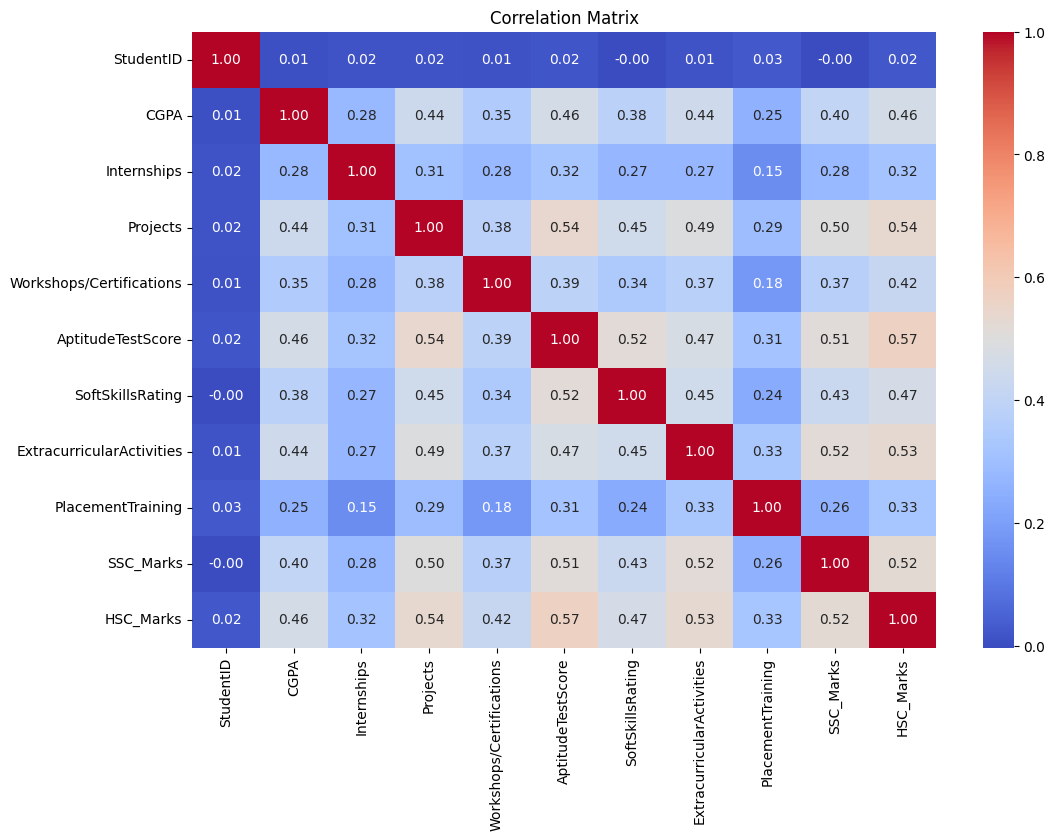

In [10]:
# Visualization
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


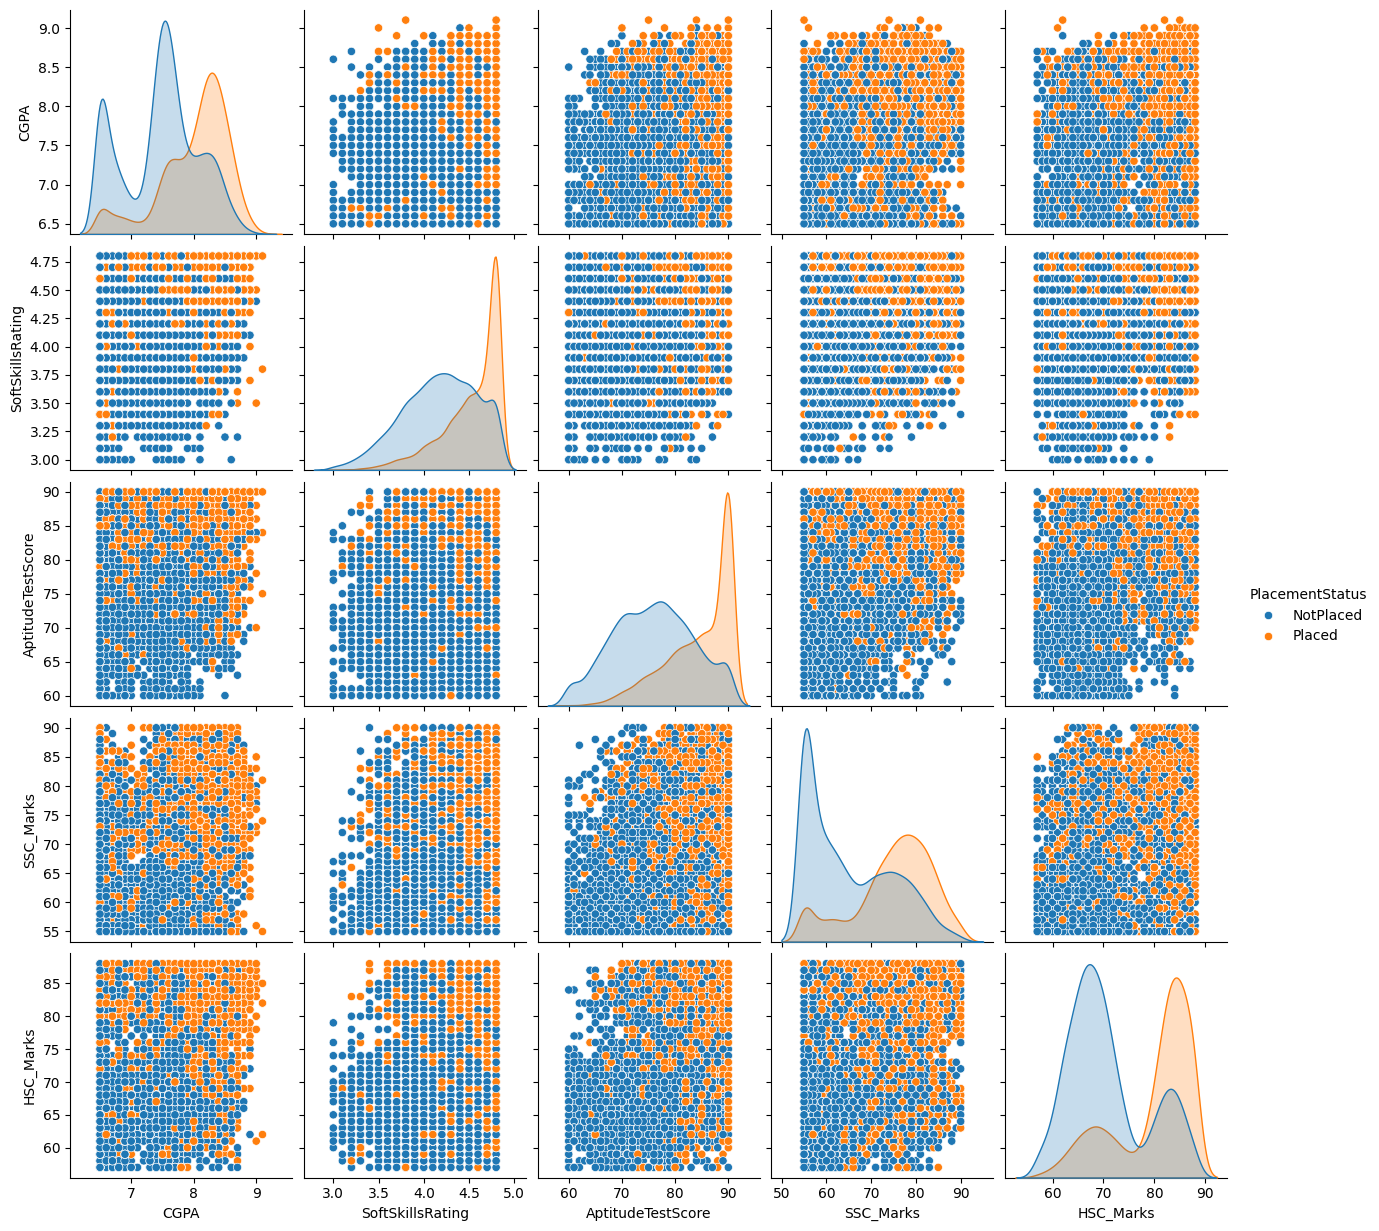

In [11]:
# Pair Plot
sns.pairplot(df, hue='PlacementStatus', vars=['CGPA', 'SoftSkillsRating', 'AptitudeTestScore', 'SSC_Marks', 'HSC_Marks'])
plt.show()

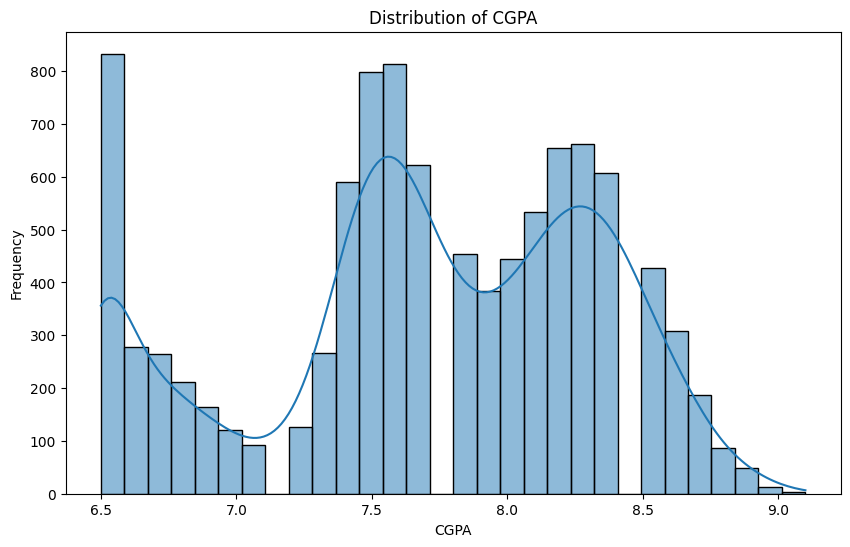

In [12]:
# Distribution of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True, bins=30)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

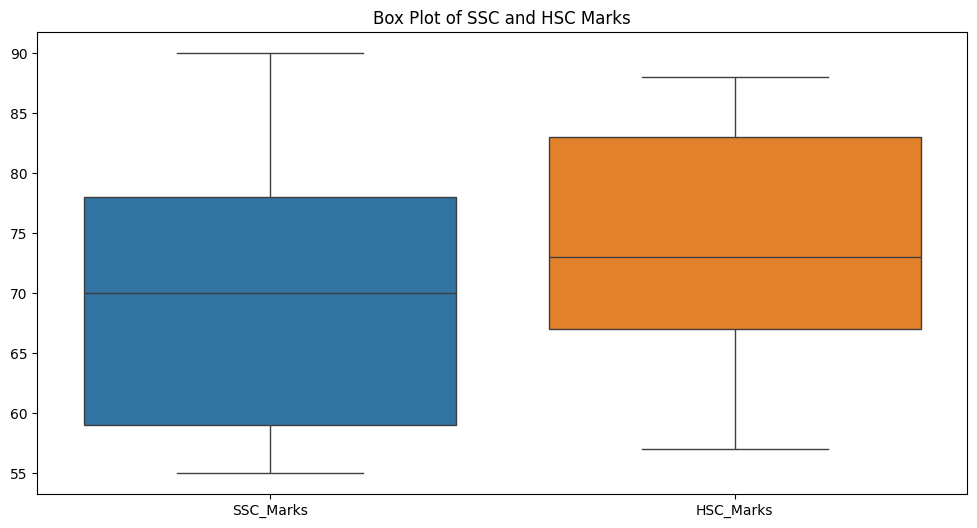

In [13]:
# Box Plot of SSC and HSC Marks
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SSC_Marks', 'HSC_Marks']])
plt.title('Box Plot of SSC and HSC Marks')
plt.show()